## EDA

In [1]:
# Импорт всех необходимых для работы библиотек 

# os
import os

# pandas
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Path
from pathlib import Path

# urllib
import urllib

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

%config InlineBackend.figure_format = 'retina'

# библиотека для работы с математикой
import numpy as np

# библиотека для работы со статистикой
from scipy import stats as st

# sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

STATE = 42

#_________________
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from timeit import default_timer as timer
from datetime import timedelta
from functools import partial
import time

# Warnings
import warnings

warnings.filterwarnings('ignore')

C:\Users\Kirill\anaconda3\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [2]:
df = pd.read_csv('autos.csv')

In [3]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.shape

(354369, 16)

In [5]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
df.nunique()

DateCrawled          271174
Price                  3731
VehicleType               8
RegistrationYear        151
Gearbox                   2
Power                   712
Model                   250
Kilometer                13
RegistrationMonth        13
FuelType                  7
Brand                    40
NotRepaired               2
DateCreated             109
NumberOfPictures          1
PostalCode             8143
LastSeen             179150
dtype: int64

In [8]:
# Функция подсчета абсолютных и относительных явных пропущенных значений
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data(df)

,Total,Percent
NotRepaired,71154,20.079070
VehicleType,37490,10.579368
FuelType,32895,9.282697
Gearbox,19833,5.596709
Model,19705,5.560588
DateCrawled,0,0.000000
Price,0,0.000000
RegistrationYear,0,0.000000
Power,0,0.000000
Kilometer,0,0.000000


In [10]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [11]:
# Переименуем gasoline на petrol (неявный дубликат)
df.FuelType.where(df.FuelType != 'gasoline', 'petrol', inplace=True)

**Вывод**

- В наборе данных 354365 объектов и 16 признаков.
- Приведем названия столбцев к нижнему регистру для удобства обращения к ним.
- В 5 столбцах содержатся пропуски, необходимо внимательнее посмотреть на признаки.
- Необходима кодировка для категориальных признаков.
- Из первых 5 строк уже видно, что можно заменить petrol и gasoline т.к. это одно и тоже).
- Даты необходимо перевести в соответствующий им формат.
- 13 месяцев... Один наверняка лишний.
- 40 марок и 250 моделей. Такие данные лучше закодировать с помощью OrdinalEncoder, иначе получится огромное число столбцов. (хотя если суть по RMSE, то OHE даст лучший результат...).
- 151 вариант года регистрации - наверняка ошибка.
- Пробег - 13 уникальных значений, скорее всего пользователи его округляли.
- Фотографий всегда 0, столбец для удаления.
- Нулевые значения месяца, мощности и стоимости - необходимо посмотреть насколько много таких значений, и если их не так много, то можем их смело выкинуть.
- Невозможные значения вроде 1000 и 9999 года или 20000 л.с. Шутка пользователей или ошибка выгрузки? В любом случае, такие выбросы лучше удалить.
- Построим violinplot для признаков, чтобы посмотреть их распределение.


## Предобработка данных

**Пропуски**

In [12]:
# Переведём все названия столбцов в нижний регистр
df.columns = df.columns.str.lower()
df.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand', 'notrepaired', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], dtype='object')

In [13]:
# Выбросим явно лишние столбцы
columns_to_drop = ['datecrawled', 'lastseen', 'numberofpictures']
df.drop(columns_to_drop, axis=1, inplace=True)
del columns_to_drop

In [14]:
# Еще раз взглянем на явные пропуски в наших данных
missing_data(df).head()

,Total,Percent
notrepaired,71154,20.079070
vehicletype,37490,10.579368
fueltype,32895,9.282697
gearbox,19833,5.596709
model,19705,5.560588


In [15]:
# Сразу же удалим все пропуски в признаках notrepaired, fueltype, gearbox, model, несмотря на то,
# что значения их нам важны, но достоверно заполнить их не предоставляется возможным 
df.dropna(subset=['notrepaired', 'fueltype', 'gearbox', 'model'], inplace=True)

In [16]:
missing_data(df).head(1)

,Total,Percent
vehicletype,8092,3.187006


In [17]:
# Изначально была идея заполнить тип кузова методом ближайших соседей, ну или по моде моделей автомобилей
# Но после дропа остальных пропусков, у нас в данном признаке осталось всего 3%, поэтому их тоже смело дропнем
df.dropna(subset=['vehicletype'], inplace=True)

**Типы данных**

In [18]:
# приведем дату в правильный вид
df.datecreated = pd.to_datetime(df.datecreated)

**Комментарий ревьюеру:** для "правильности" кода всегда лучше писать через полную форму .loc или же можно все-таки через сокращенную? 

In [19]:
# Создадим столбцы "год", "месяц" и "день"
df.loc[:, 'year_created'] = df.datecreated.dt.year
df.loc[:, 'month_created'] = df.datecreated.dt.month
df.loc[:, 'day_created'] = df.datecreated.dt.day

In [20]:
# Дропнем столбец datecreated 
df.drop('datecreated', axis=1, inplace=True)


**OHE**

In [21]:
# Чтобы не плодить большое количество новых признаков, применим OHE только для столбцов с количеством уникальных значений <=20
df.nunique()[df.nunique() <= 20]

vehicletype           8
gearbox               2
kilometer            13
registrationmonth    13
fueltype              6
notrepaired           2
year_created          2
month_created         8
dtype: int64

In [22]:
# Чтобы не портить основной датафрейм, объявим новый
columns_to_ohe = ['vehicletype', 'gearbox', 'fueltype', 'notrepaired']
df_ohe = (df
         .drop(columns_to_ohe, axis=1)
         .join(pd.get_dummies(df[columns_to_ohe]))
         .reset_index(drop=True))

In [23]:
del columns_to_ohe
df_ohe

,price,registrationyear,power,model,kilometer,registrationmonth,brand,postalcode,year_created,month_created,day_created,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_wagon,gearbox_auto,gearbox_manual,fueltype_cng,fueltype_electric,fueltype_hybrid,fueltype_lpg,fueltype_other,fueltype_petrol,notrepaired_no,notrepaired_yes
0,1500,2001,75,golf,150000,6,volkswagen,91074,2016,3,17,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
1,3600,2008,69,fabia,90000,7,skoda,60437,2016,3,31,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,650,1995,102,3er,150000,10,bmw,33775,2016,4,4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
3,2200,2004,109,2_reihe,150000,8,peugeot,67112,2016,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,0,1980,50,other,40000,7,volkswagen,19348,2016,3,21,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245809,3999,2005,3,3er,150000,5,bmw,81825,2016,4,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
245810,3200,2004,225,leon,150000,5,seat,96465,2016,3,19,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
245811,1150,2000,0,zafira,150000,3,opel,26624,2016,3,27,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
245812,1199,2000,101,fortwo,125000,3,smart,26135,2016,3,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


**Ordinal**

In [24]:
encoder = OrdinalEncoder()
columns_to_ordinal = ['model', 'brand']

In [25]:
encoder.fit_transform(df_ohe[columns_to_ordinal]) 

array([[116.,  37.],
       [101.,  31.],
       [ 11.,   2.],
       ...,
       [248.,  24.],
       [106.,  32.],
       [223.,  37.]])

In [26]:
df_ordinal = pd.DataFrame(encoder.transform(df_ohe[columns_to_ordinal]), 
                                                      columns=df_ohe[columns_to_ordinal].columns) 

In [27]:
# Получим итоговый датафрейм с которым и будем в дальнейшем работать
df_encoded = pd.concat([df_ohe, df_ordinal], axis=1)

In [28]:
df_encoded = (df_encoded
              .drop(columns_to_ordinal, axis=1))

In [29]:
del columns_to_ordinal

**Дубликаты**

In [30]:
# После того как мы разделили дату на три разных колонки и закодировали все признаки, у нас наверняка появились дубликаты
df_encoded.duplicated().sum() / df_encoded.shape[0]

0.035095641419935396

In [31]:
# Всего 3 процентра дубликатов, смело их дропаем
df_encoded.drop_duplicates(inplace=True)
df_encoded = df_encoded.reset_index(drop=True)

**Распределение признаков**

In [32]:
# Посмотрим на распределение количественных признаков
columns_for_violinplot = ['price', 'registrationyear', 'power', 'kilometer', 'year_created']

def violinplots(columns):
    for column in columns:
        sns.boxplot(x=df_encoded[column], showfliers=False, showbox=False, whis=[2.5,97.5]) 
        # что-то я не придумал как отобразить 95% доверительный интервал, поэтому просто нарисовал невидимый боксплот
        sns.violinplot(df_encoded[column], inner='box', color = 'r').set_title("{0}".format(column), fontsize=15)
        plt.show()

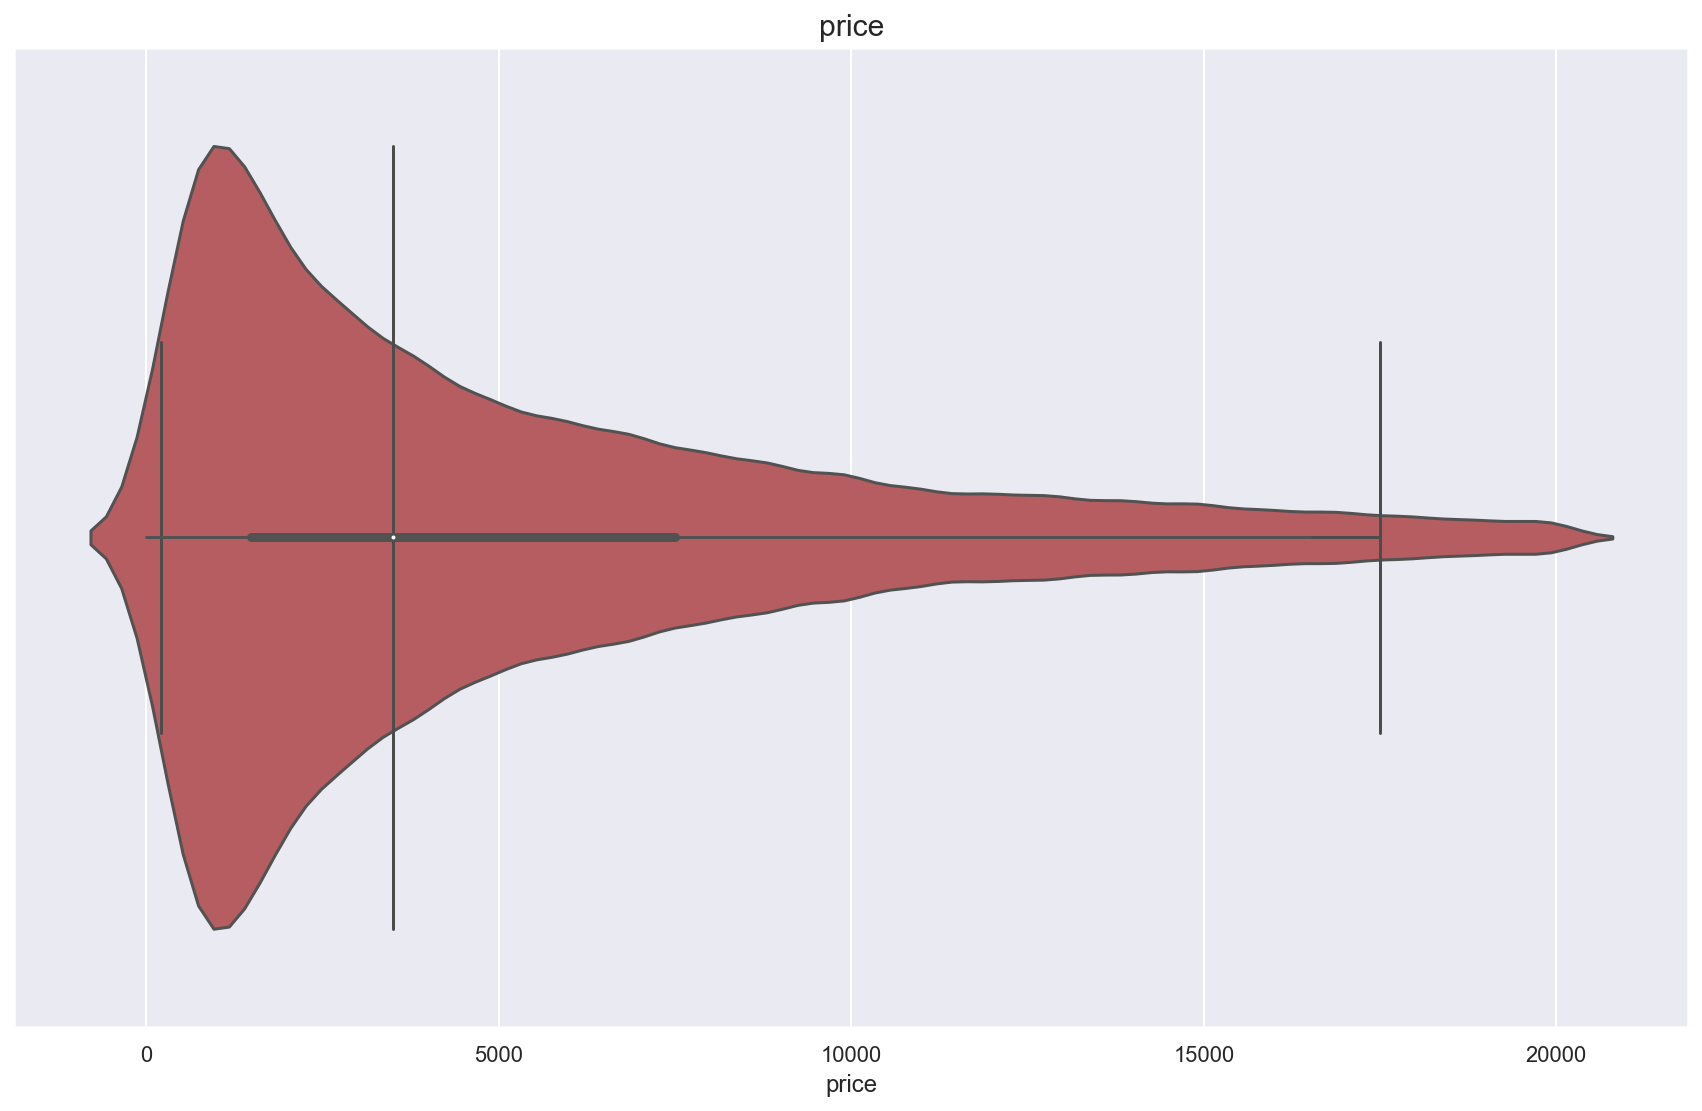

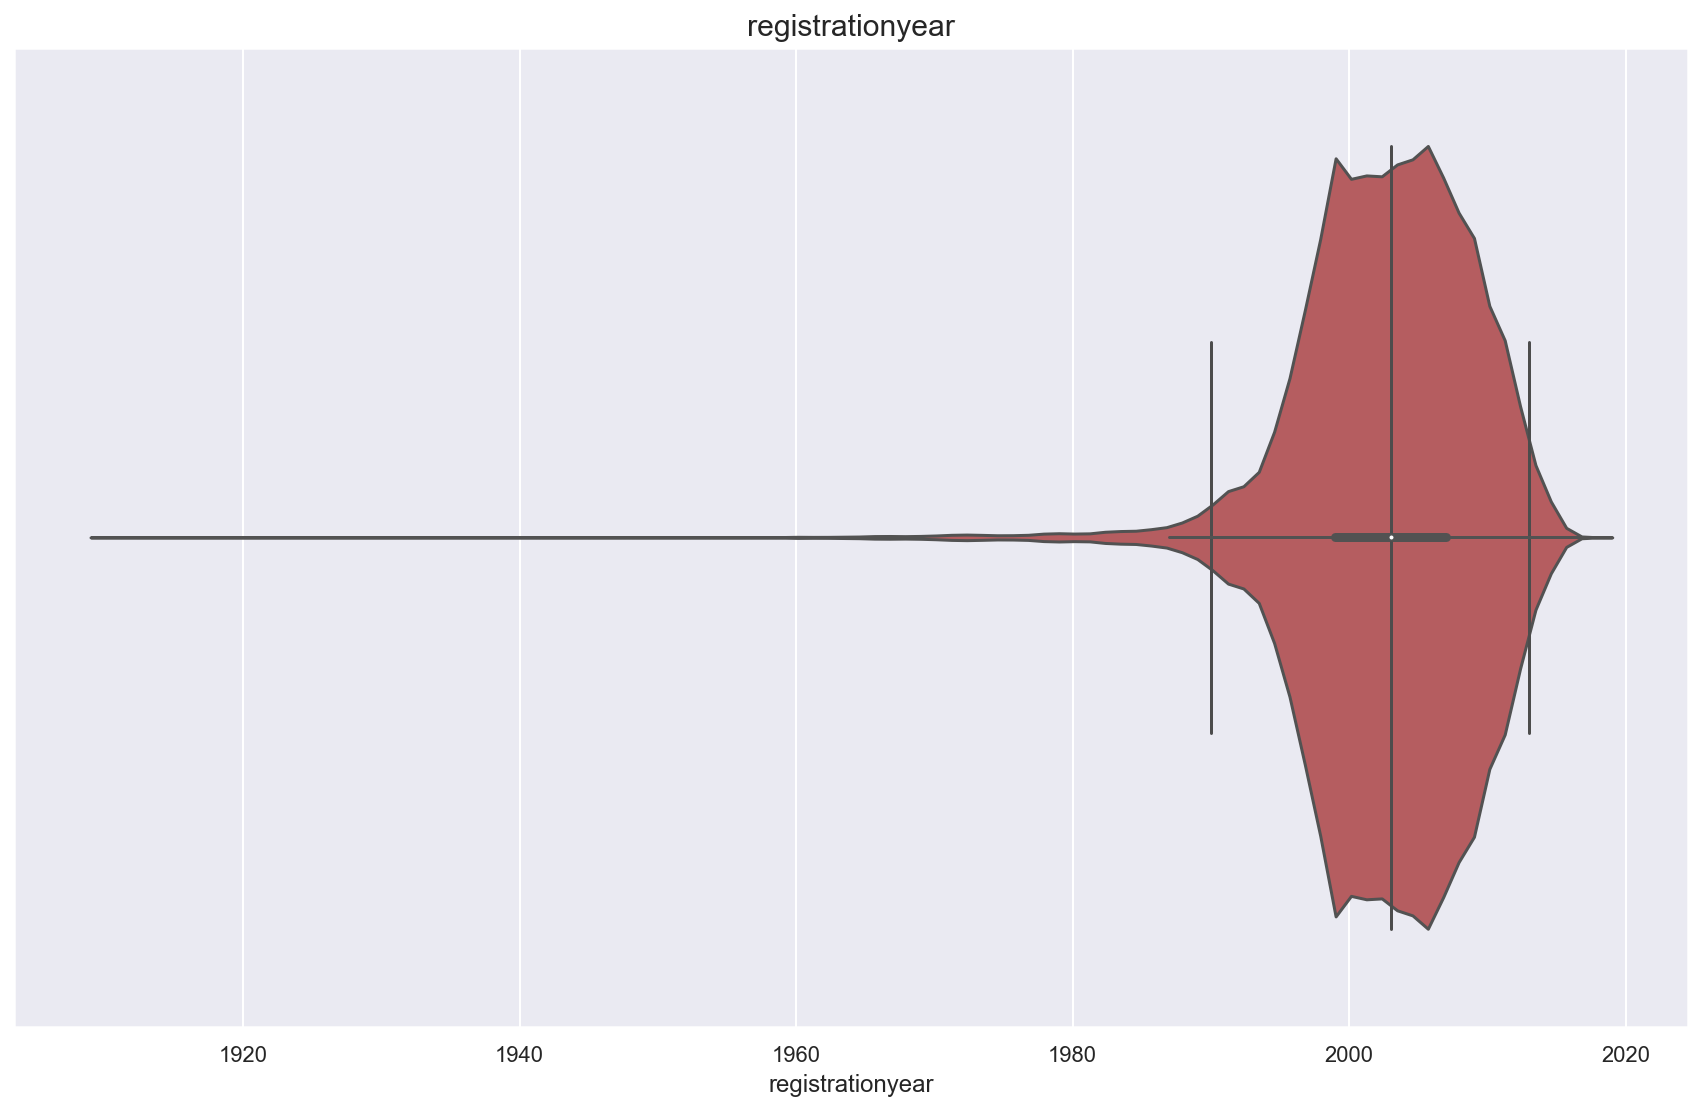

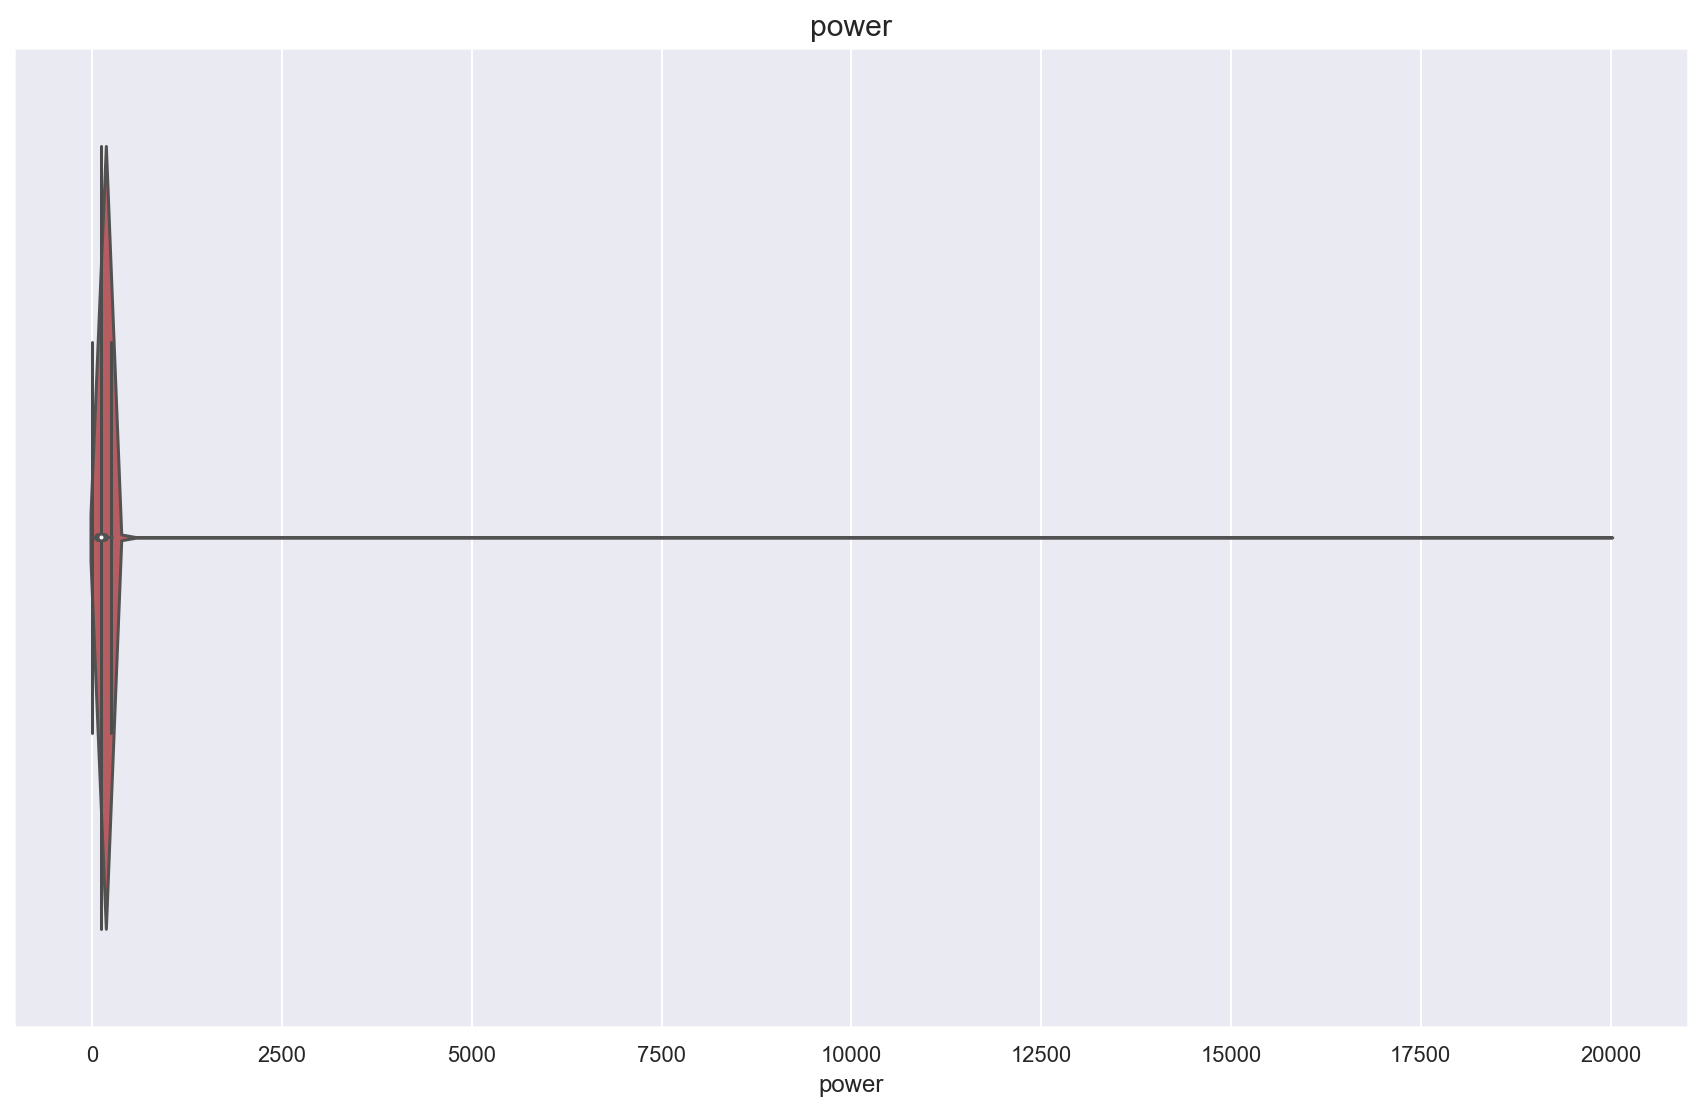

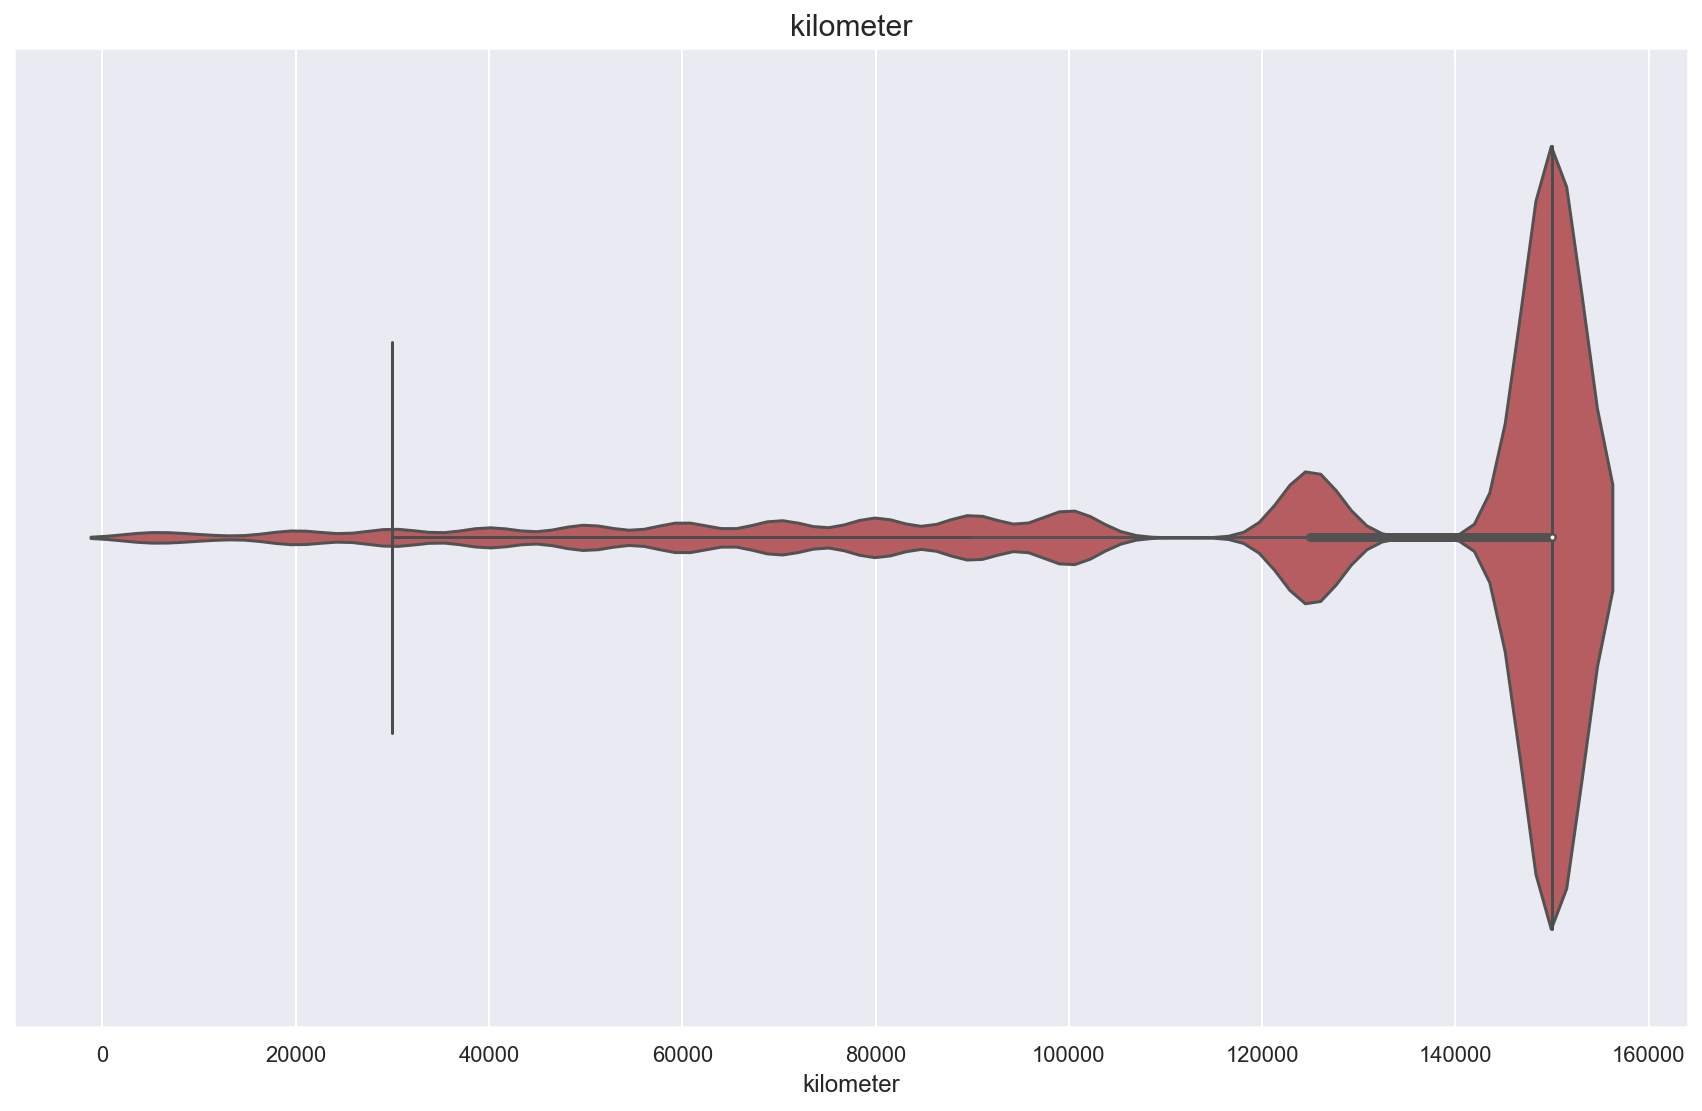

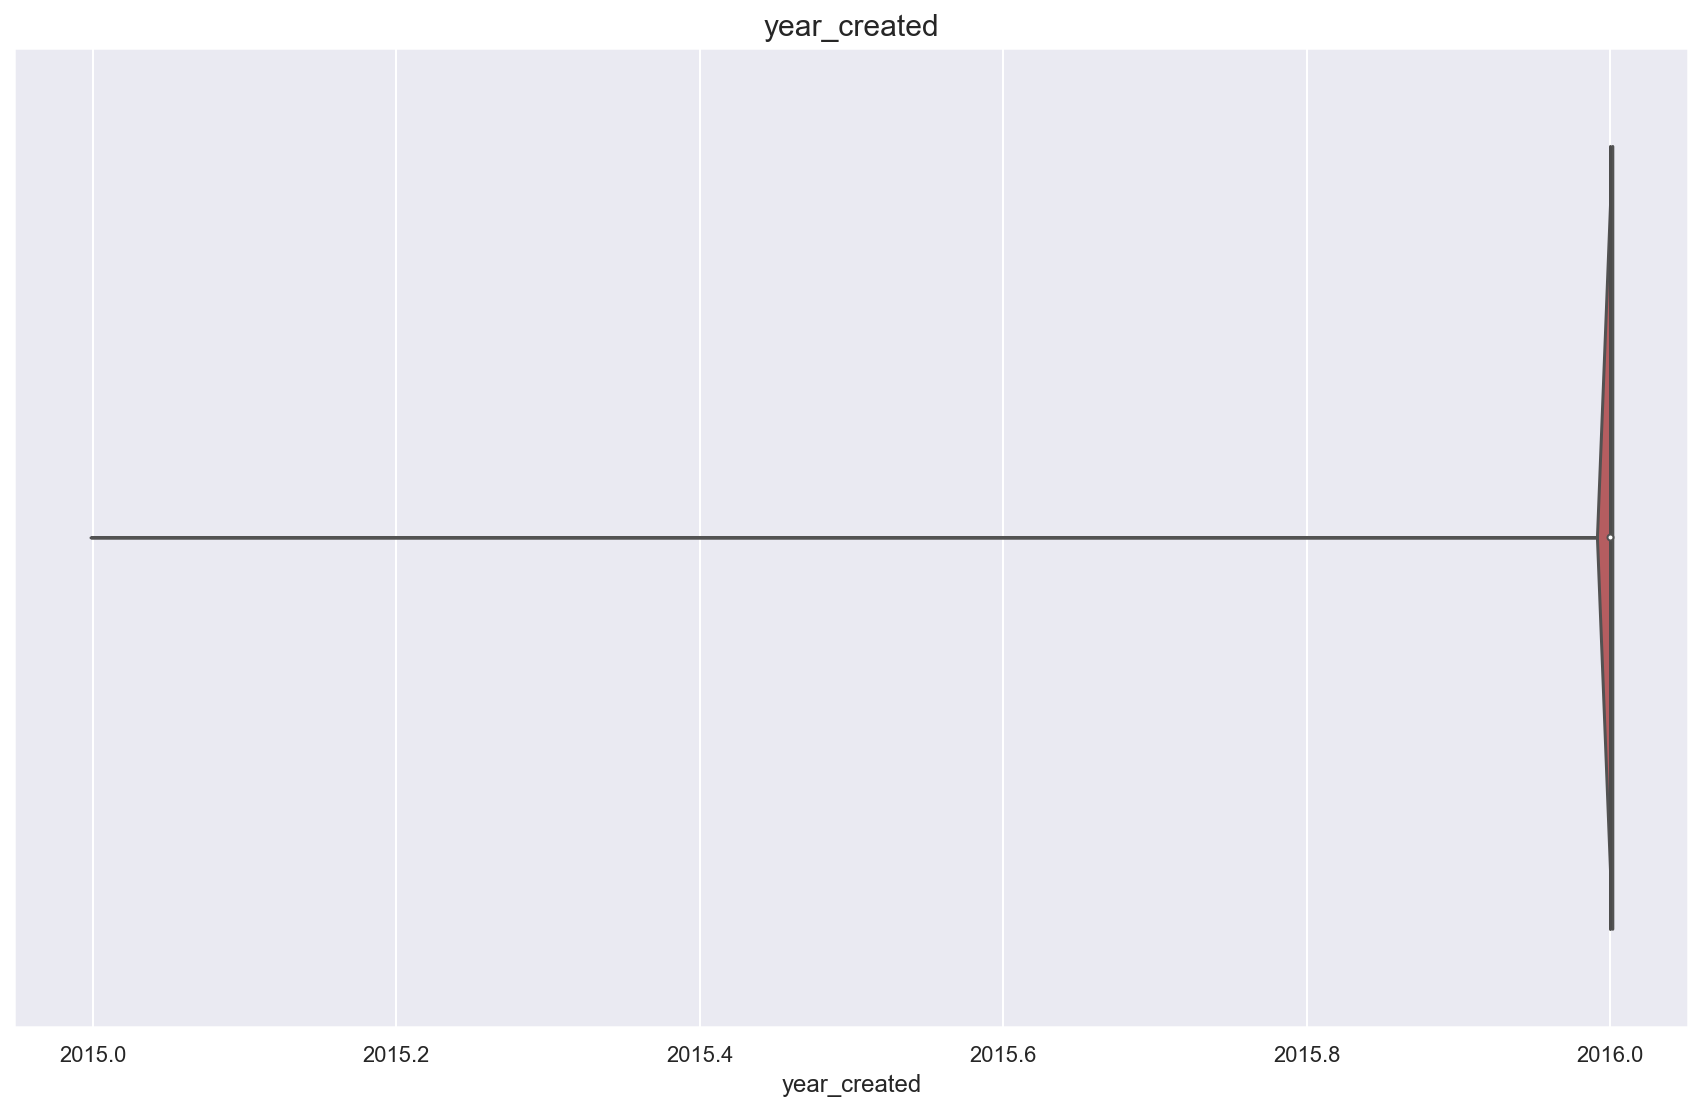

In [33]:
violinplots(columns_for_violinplot)

In [34]:
# Выкинем столбец с годом размещения объявления, т.к. там оказалось только одно значение...
df_encoded.drop('year_created', axis=1, inplace=True)
columns_for_violinplot.remove('year_created')

In [35]:
# Распределение целевого признака, а так же пробега не вызывает вопросов, их трогать мы не будем
# В то время как мощность двигателя и год регистрации содержат явные выбросы
# Откинем все значения < 2.5% и > 97.5% квантилей
df_encoded = df_encoded.loc[(df_encoded.registrationyear < df_encoded.registrationyear.quantile(.975)) & 
               (df_encoded.registrationyear > df_encoded.registrationyear.quantile(.025)) &
                           (df_encoded.power < df_encoded.power.quantile(.975)) & 
               (df_encoded.power > df_encoded.power.quantile(.025))]

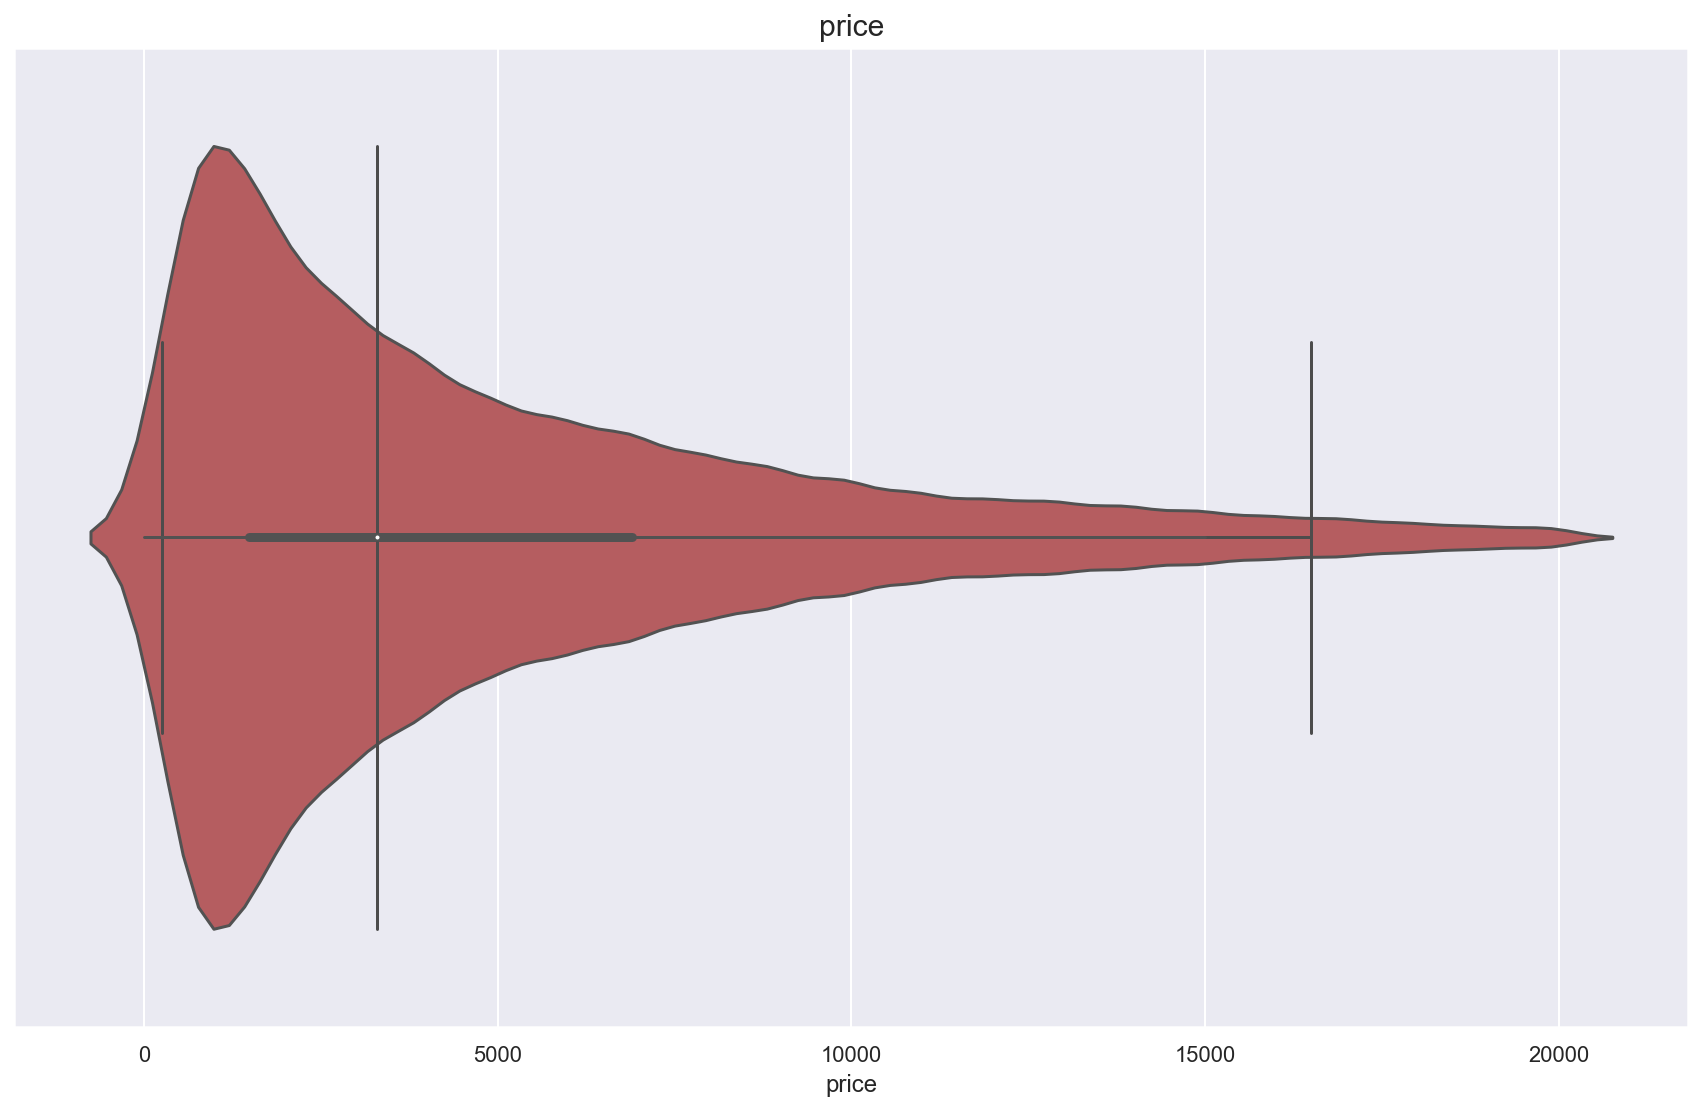

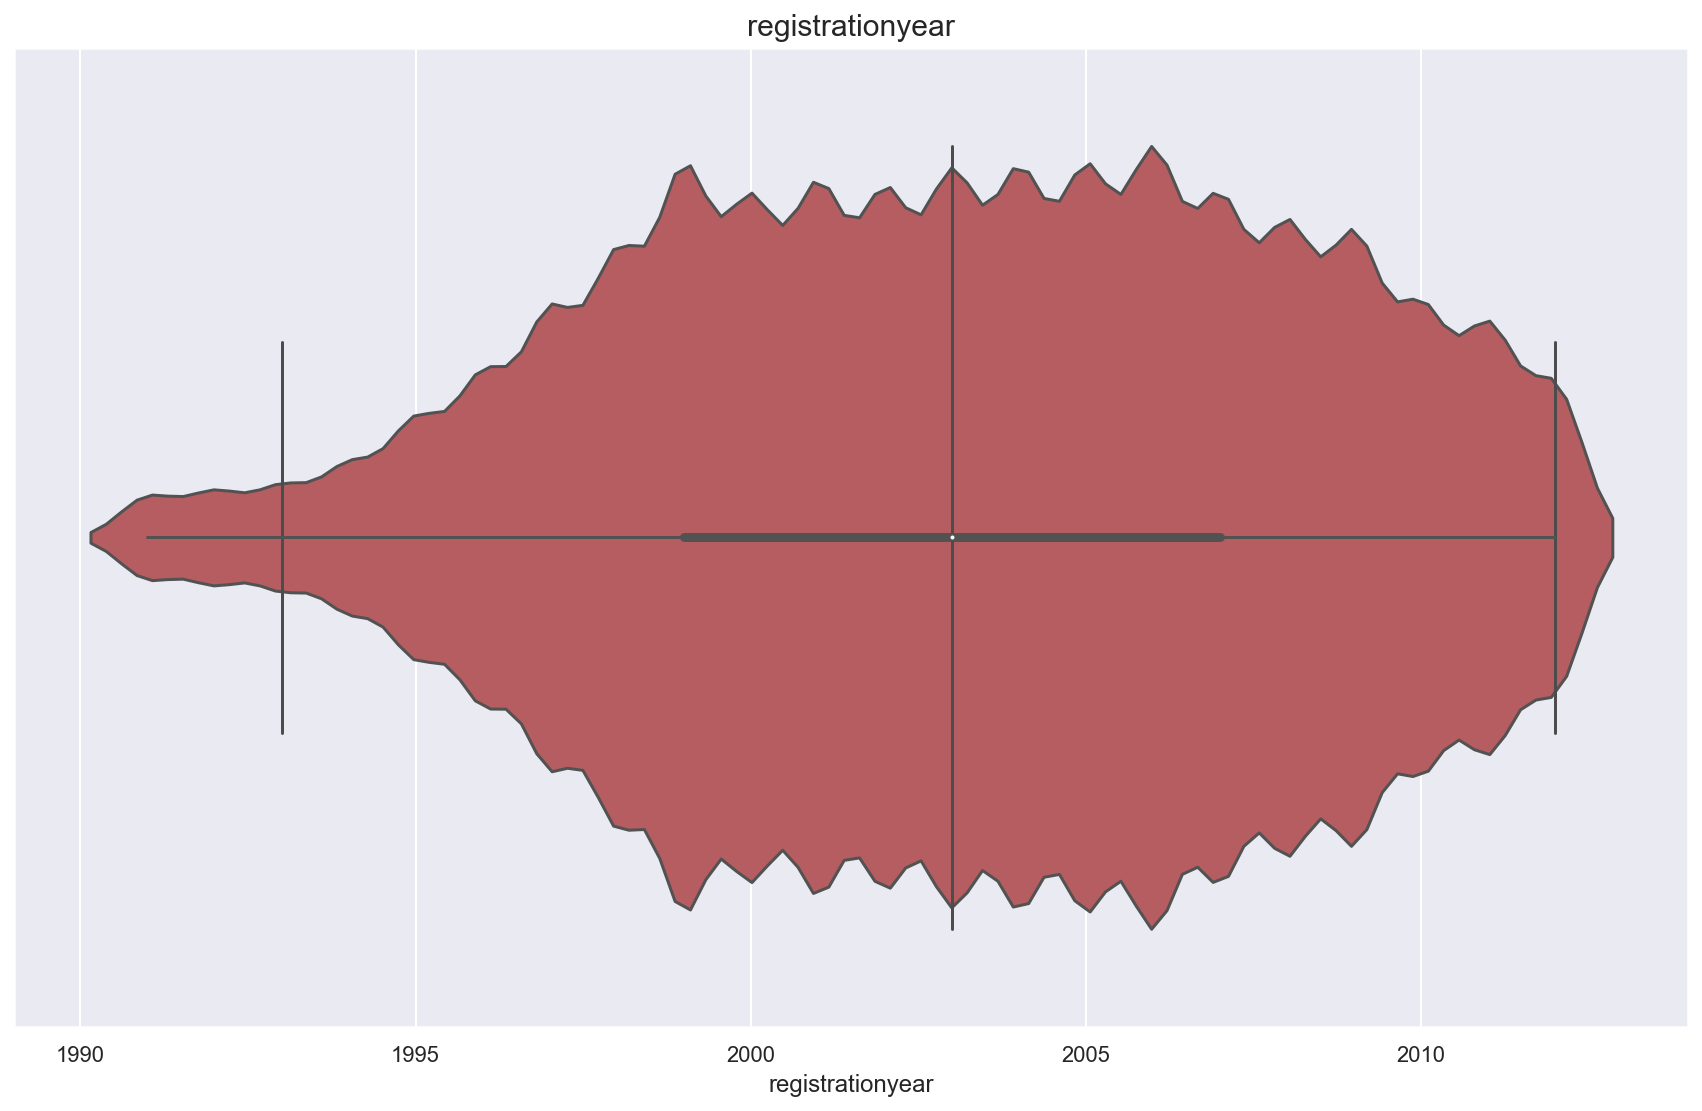

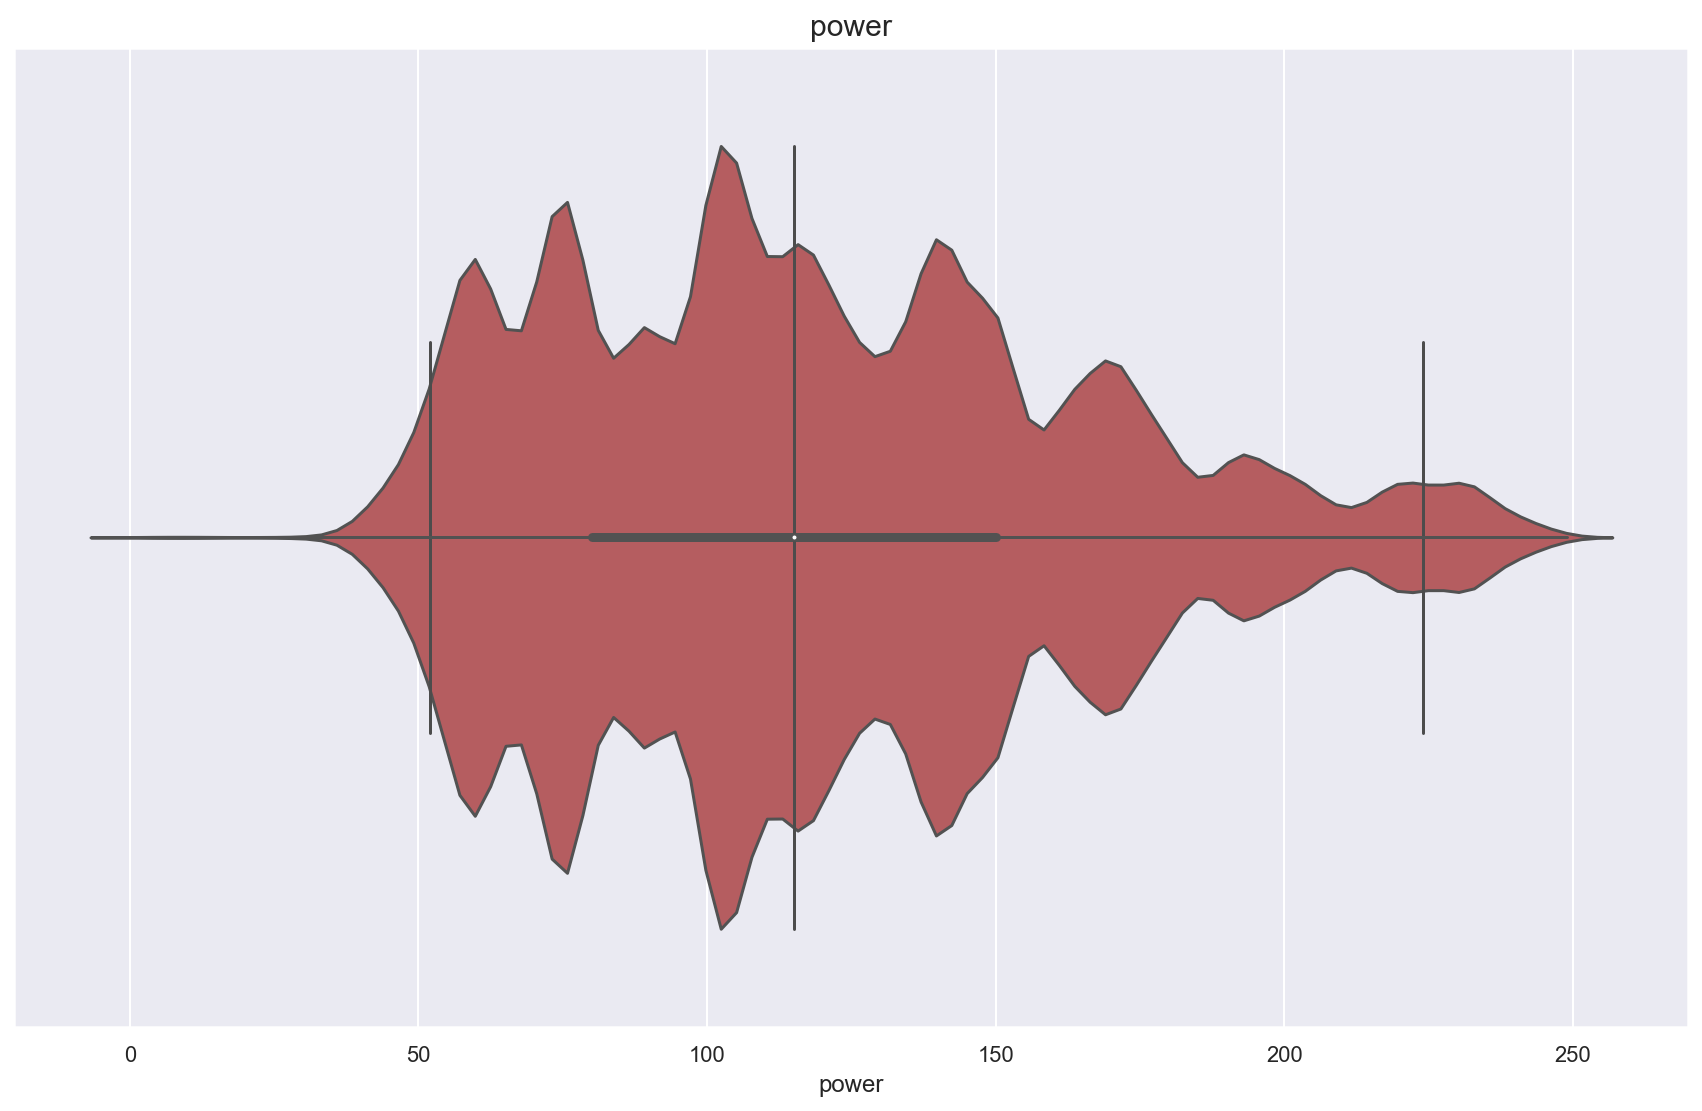

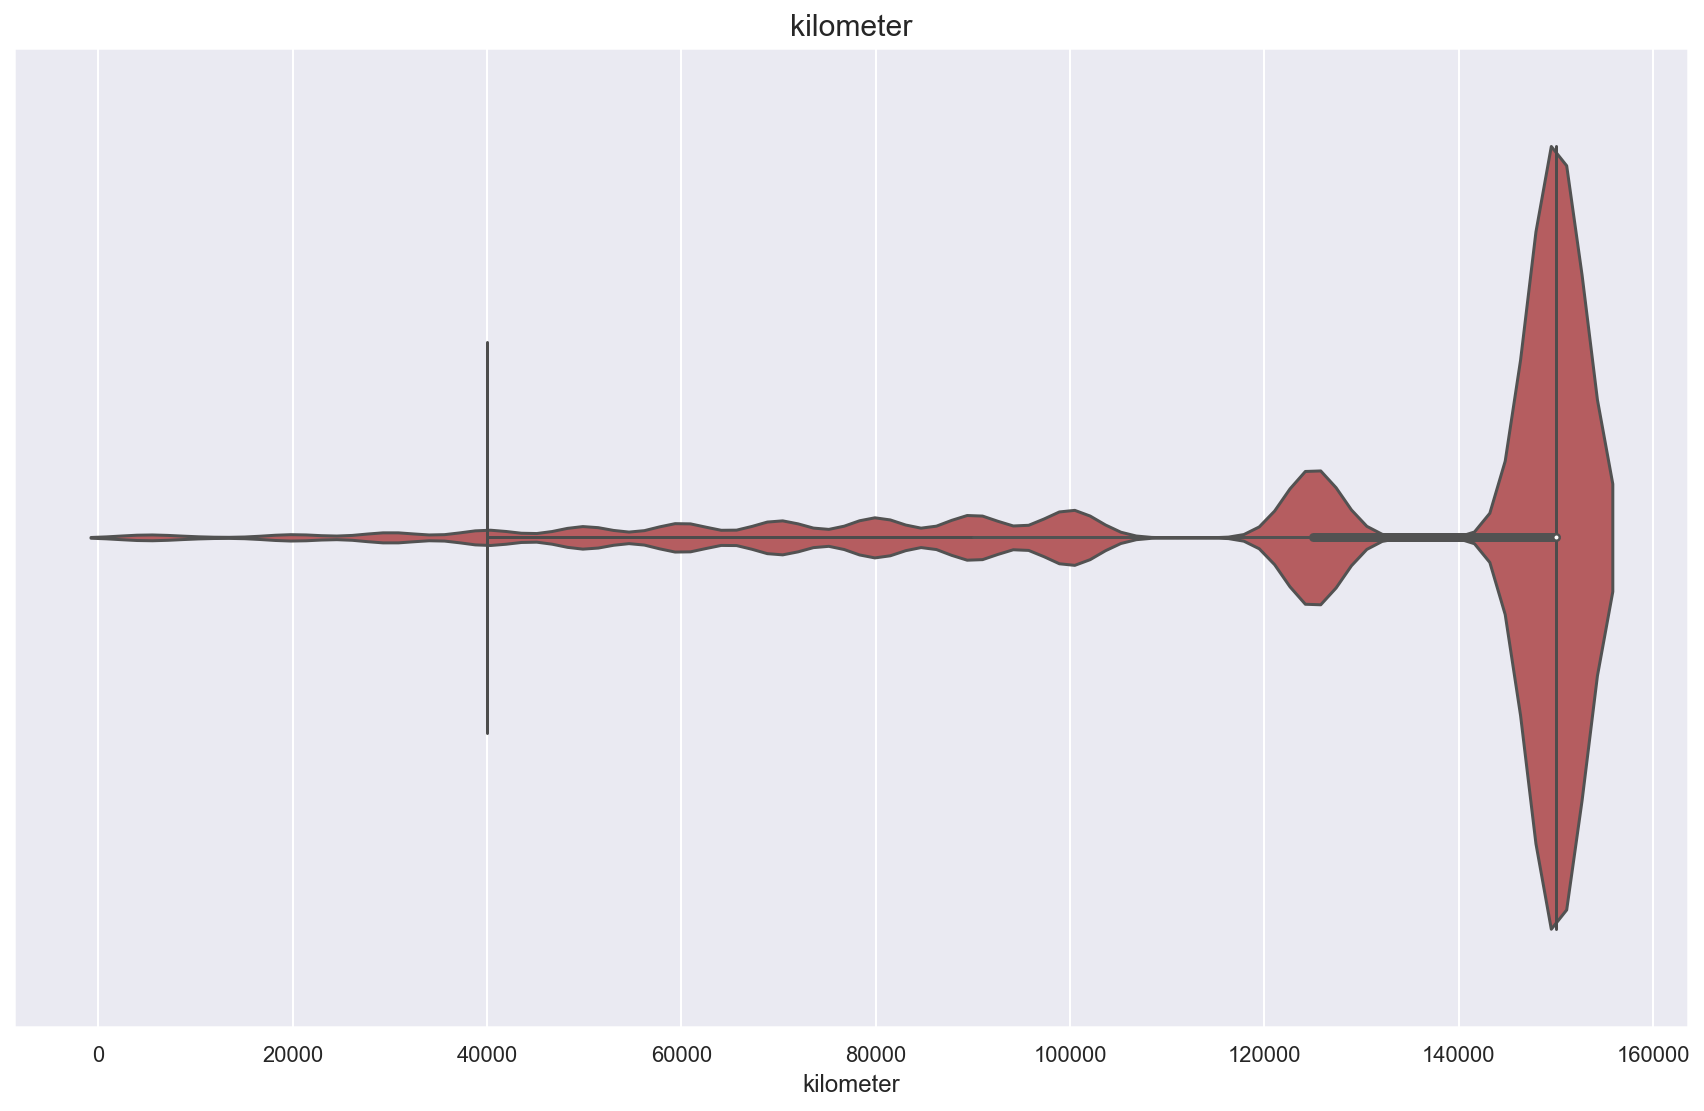

In [36]:
# Еще раз посмотрим на распределение наших признаков
violinplots(columns_for_violinplot)

In [37]:
del columns_for_violinplot

**Масштабирование**

In [38]:
# Напишем функцию, которая поделит наши датасеты на обучающие и валидационные выборки
def split_data(df):
    features = df.drop(['price'], axis=1)
    target = df['price']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=STATE)
    print(features_train.shape)
    print(features_valid.shape)
    scaler = MinMaxScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features, target, features_train, target_train, features_valid, target_valid


features, target, features_train, target_train, features_valid, target_valid = split_data(df_encoded)

(157114, 25)
(52372, 25)


**Вывод**

- Избавились от записей с пропущенными значениями.
- Так же удалили все полные дубликаты.
- Закодировали по принципу One-Hot столбцы, в которых менее 20 уникальных значений.
- Закодировали марки и модели автомобилей числами с помощью OrdinalEncoder.
- Посмотрели на распределение признаков.
- Избавились от выбросов в числовых признаках.
- Промасштобировали данные.

## Обучение моделей

**Линейная регрессия**

In [39]:
# Обьявим новый датафрейм куда будем записывать показатели моделей
result = pd.DataFrame(columns=['Алгоритм',
                               'RMSE',
                               'Скорость обучения, сек',
                               'Время предсказания, сек',
                               'Выборка'])

In [40]:
start_learn = time.time()
model = LinearRegression()
model.fit(features_train, target_train)
end_learn = round(time.time() - start_learn, 2)

print('Время обучения модели линейной регрессии: {}'.format(end_learn))

Время обучения модели линейной регрессии: 0.08


In [41]:
start_predict = time.time()
predictions = model.predict(features_valid)
end_predict = round(time.time() - start_predict, 2)
rmse = int(mean_squared_error(predictions, target_valid)**0.5)

result.loc[len(result)] = ('Линейная регрессия', rmse, end_learn, end_predict, 'валидационная') 
print('RMSE линейной регрессии на валидационной выборке - ', rmse)
print('Время предсказания линейной регрессии: {}'.format(end_predict))

RMSE линейной регрессии на валидационной выборке -  2453
Время предсказания линейной регрессии: 0.0


**LGBMRegressor**

In [42]:
# 'neg_root_mean_squared_error'
def metric(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
mscorer = make_scorer(metric, greater_is_better=False)

In [43]:
%%time
estimator = LGBMRegressor()
params_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40],
    'max_depth': [5, 10, 20]
}

gbm = GridSearchCV(estimator, params_grid, scoring=mscorer, cv=3)
gbm.fit(features_train, target_train)
params = gbm.best_params_
print('Лучшие параметры для модели LGBMRegressor:', gbm.best_params_)

Лучшие параметры для модели LGBMRegressor: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 40}
Wall time: 11.3 s


In [44]:
model = LGBMRegressor(learning_rate = params['learning_rate'],
                          n_estimators = params['n_estimators'],
                          max_depth = params['max_depth'])

final_score = np.mean(cross_val_score(model, features, target, cv = 3))
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.8310510955077427


In [45]:
start_learn = time.time()
model = LGBMRegressor(learning_rate = params['learning_rate'],
                          n_estimators = params['n_estimators'],
                          max_depth = params['max_depth'])
model.fit(features_train, target_train)
end_learn = round(time.time() - start_learn, 2)

print('Время обучения модели LGBMRegressor: {}'.format(end_learn))

Время обучения модели LGBMRegressor: 0.21


In [46]:
start_predict = time.time()
predictions = model.predict(features_valid)
end_predict = round(time.time() - start_predict, 2)
rmse = int(mean_squared_error(predictions, target_valid)**0.5)

result.loc[len(result)] = ('LGBMRegressor', rmse, end_learn, end_predict, 'валидационная') 
print('RMSE LGBMRegressor на валидационной выборке - ', rmse)
print('Время предсказания LGBMRegressor - {}'.format(end_predict))

RMSE LGBMRegressor на валидационной выборке -  1807
Время предсказания LGBMRegressor - 0.03


**Catboost**

In [47]:
#estimator = CatBoostRegressor()
#params_grid = {
#    'learning_rate': [0.01, 0.1, 1],
#    'iterations': [1, 100],
#    'depth': [5, 10, 16],
#    'reg_lambda': [1, 5]
#}
#
#gbm = GridSearchCV(estimator, params_grid, cv=3)
#gbm.fit(features_train, target_train)
#params = gbm.best_params_
#print('Лучшие параметры для модели CatBoostRegressor:', gbm.best_params_)

In [48]:
params = {
 'depth': 16,
 'iterations': 100,
 'learning_rate': 0.1,
 'reg_lambda': 5.0
 }

In [49]:
#model = CatBoostRegressor(learning_rate = params['learning_rate'],
#                          depth = params['depth'],
#                          iterations = params['iterations'],
#                          reg_lambda = params['reg_lambda'],
#                          verbose=10)
#
#final_score = np.mean(cross_val_score(model, features, target, cv = 3))
#print('Средняя оценка качества модели:', final_score)

In [50]:
start_learn = time.time()
model = CatBoostRegressor(learning_rate = params['learning_rate'],
                          depth = params['depth'],
                          iterations = params['iterations'],
                          reg_lambda = params['reg_lambda'],
                          verbose=10)
model.fit(features_train, target_train)
end_learn = round(time.time() - start_learn, 2)

print('Время обучения модели CatBoostRegressor: {}'.format(end_learn))

0:	learn: 4056.0439572	total: 982ms	remaining: 1m 37s
10:	learn: 2324.0863992	total: 9.02s	remaining: 1m 12s
20:	learn: 1900.7420330	total: 16.9s	remaining: 1m 3s
30:	learn: 1788.8081517	total: 25.2s	remaining: 56.2s
40:	learn: 1739.6571930	total: 33.7s	remaining: 48.5s
50:	learn: 1708.7986834	total: 41.8s	remaining: 40.2s
60:	learn: 1685.8394065	total: 50s	remaining: 32s
70:	learn: 1664.6404924	total: 58.2s	remaining: 23.8s
80:	learn: 1640.4991920	total: 1m 6s	remaining: 15.6s
90:	learn: 1620.3631601	total: 1m 14s	remaining: 7.38s
99:	learn: 1603.8477303	total: 1m 22s	remaining: 0us
Время обучения модели CatBoostRegressor: 83.01


In [51]:
start_predict = time.time()
predictions = model.predict(features_valid)
end_predict = round(time.time() - start_predict, 2)
rmse = int(mean_squared_error(predictions, target_valid)**0.5)

result.loc[len(result)] = ('CatBoostRegressor', rmse, end_learn, end_predict, 'валидационная') 
print('RMSE CatBoostRegressor на валидационной выборке - ', rmse)
print('Время предсказания CatBoostRegressor - {}'.format(end_predict))

RMSE CatBoostRegressor на валидационной выборке -  1757
Время предсказания CatBoostRegressor - 0.02


**DummyRegressor**

In [52]:
dummy = DummyRegressor(strategy="median")
dummy.fit(features_train, target_train)
dummy_predict = dummy.predict(features_valid)
dummy_rmse = int(mean_squared_error(dummy_predict, target_valid)**0.5)
result.loc[len(result)] = ('DummyRegressor', dummy_rmse, '-', '-', 'валидационная')
print('RMSE DummyRegressor на валидационной выборке', dummy_rmse)

RMSE DummyRegressor на валидационной выборке 4621


In [53]:
## Анализ моделей

In [54]:
# Лишний раз убедимся, что в нашем проекте выиграла модель LightGBM

result

,Алгоритм,RMSE,"Скорость обучения, сек","Время предсказания, сек",Выборка
0,Линейная регрессия,2453,0.08,0.0,валидационная
1,LGBMRegressor,1807,0.21,0.03,валидационная
2,CatBoostRegressor,1757,83.01,0.02,валидационная
3,DummyRegressor,4621,-,-,валидационная


## Вывод

- Мы изучили данные из базы объявлений о продаже автомобилей и определили набор действий, которые выполним на этапе предобработки данных.
- Выполнили предобработку данных, по возможности заполняя пропуски в данных и удаляя сомнительные строки, которые могут породить ошибки при обучении.
- Закодировали категориальные признаки при помощи методов One-Hot, Ordinal Encoder, разделили данные на выборки для обучения и тестирования, затем количественные признаки отмасштабировали с помощью MinMaxScaler.
- Обучили модели градиентного бустинга LightGBM и CatBoost при помощи случайной оптимизации гиперпараметров.
- Сделали вывод, что лучшей моделью для решения нашей задачи будет LightGBM, потому что она обеспечивает хорошее качество предсказаний при меньшем времени обучения.